# Exploratory Data Analysis - Terrorism

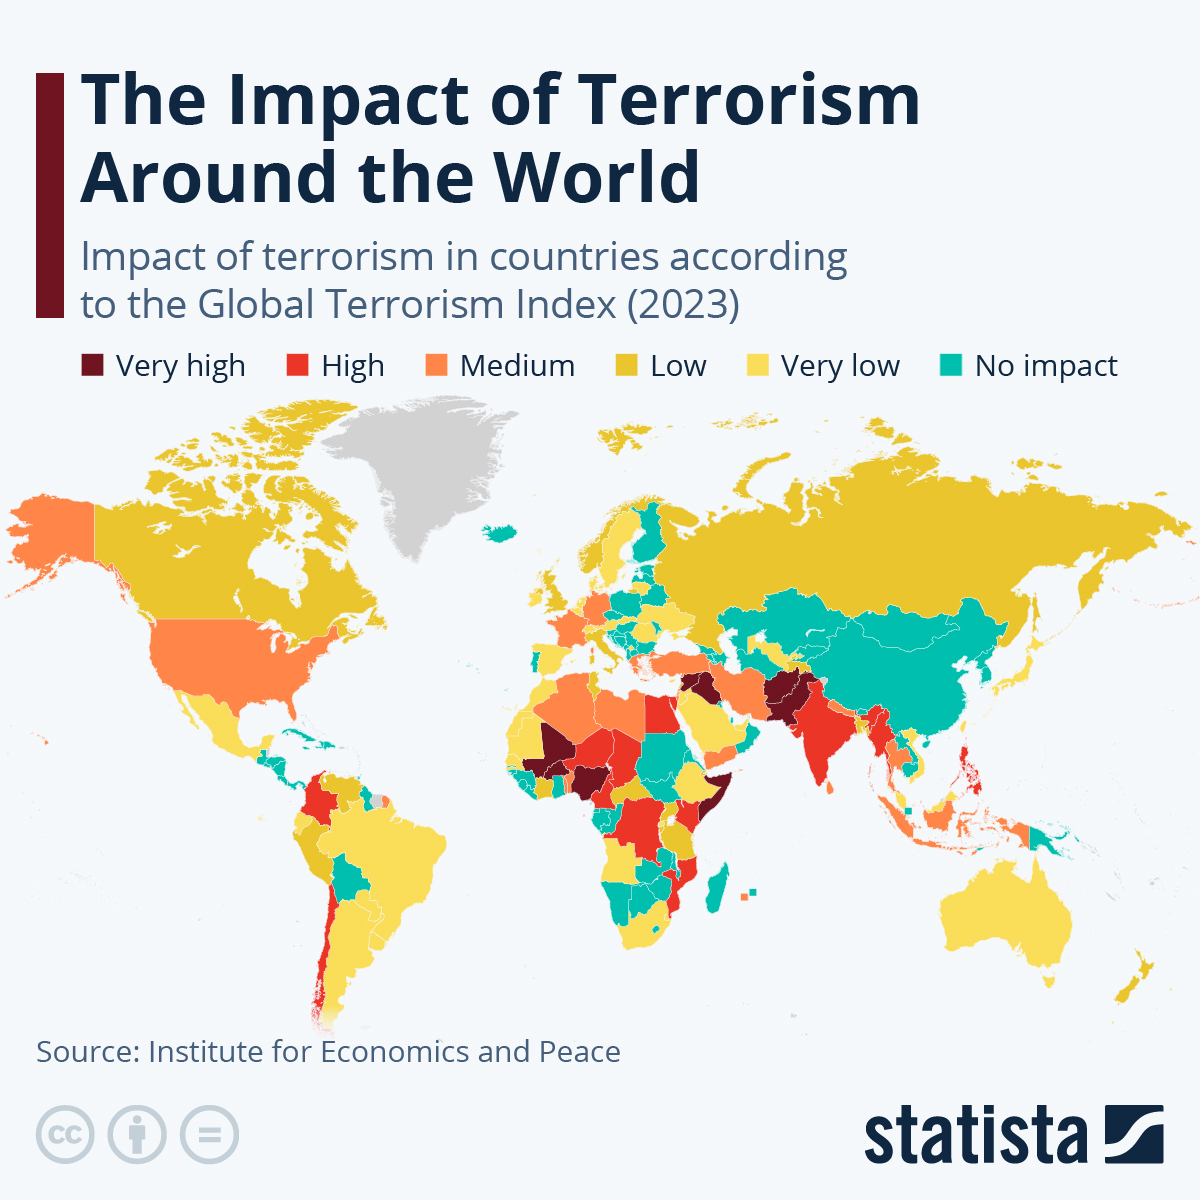

#### -Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
#### -As a security/defense analyst, try to find out the hot zone of terrorism.
#### -What all security issues and insights you can derive by EDA?

## Importing Necesssary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading Data

In [3]:
data = pd.read_csv('globalterrorism.csv', encoding = 'latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Analysing Data

In [4]:
data.shape

(181691, 135)

In [9]:
data_shape = data.shape

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

## Data Cleaning

In [8]:
missing_values = data.isnull().sum()

In [10]:
#displaying missing values and their count
missing_values_percentage = (missing_values / data_shape[0]) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_values_percentage
})

missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

missing_data

,Missing Values,Percentage (%)
gsubname3,181671,99.988992
weapsubtype4,181621,99.961473
weapsubtype4_txt,181621,99.961473
weaptype4,181618,99.959822
weaptype4_txt,181618,99.959822
...,...,...
guncertain1,380,0.209146
ishostkid,178,0.097969
specificity,6,0.003302
doubtterr,1,0.000550


In [11]:
columns_to_drop = missing_values_percentage[missing_values_percentage > 50].index

In [12]:
columns_to_drop

Index(['approxdate', 'resolution', 'location', 'alternative',
       'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3',
       'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2',
       'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2',
       'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
       'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert'

In [13]:
data_cleaned = data.drop(columns = columns_to_drop)
data_cleaned

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,0.0,0.0,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,0.0,0.0,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,0.0,1,0.0,"""Maguindanao clashes trap tribe members,"" Phil...",START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,0.0,0.0,-9,0.0,"""Trader escapes grenade attack in Imphal,"" Bus...",START Primary Collection,-9,-9,0,-9


## Handling Missing Values

In [14]:
# Fill missing values for other columns based on their data type
for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object':
        # Fill missing values for categorical columns with a placeholder ('Unknown')
        data_cleaned[column].fillna('Unknown', inplace=True)
    else:
        # Fill missing values for numerical columns with mean
        mean_value = data_cleaned[column].mean()
        data_cleaned[column].fillna(mean_value, inplace=True)

# Removal of Duplicate Rows
data_cleaned.drop_duplicates(inplace=True)

# The dataset is now cleaned, and i saved it as 'terrorism_data'
terrorism_data = data_cleaned
terrorism_data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Unknown,...,0.038944,0.107163,0,0.0,Unknown,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,0.038944,0.107163,0,1.0,Unknown,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.038944,0.107163,0,0.0,Unknown,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0.038944,0.107163,1,0.0,Unknown,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0.038944,0.107163,1,0.0,Unknown,PGIS,-9,-9,1,1


In [15]:
terrorism_data.duplicated().sum()

0

In [16]:
terrorism_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [17]:
import seaborn as sns
%matplotlib inline

In [18]:
terrorism_data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                   'region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude',
                   'attacktype1_txt':'AttackType','targtype1_txt':'TargetType','targsubtype1_txt':'TargetSubType',
                   'weaptype1_txt':'WeaponType','gname':'Group','nkill':'Killed','nwound':'Wounded','summary':'Summary','motive':'Motive'},inplace=True)

In [19]:
df = terrorism_data
df

,eventid,Year,Month,Day,extended,country,Country,region,Region,State,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Unknown,...,0.038944,0.107163,0,0.0,Unknown,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,0.038944,0.107163,0,1.0,Unknown,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.038944,0.107163,0,0.0,Unknown,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0.038944,0.107163,1,0.0,Unknown,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0.038944,0.107163,1,0.0,Unknown,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,0.000000,0.000000,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,0.000000,0.000000,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.000000,0.000000,1,0.0,"""Maguindanao clashes trap tribe members,"" Phil...",START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,0.000000,0.000000,-9,0.0,"""Trader escapes grenade attack in Imphal,"" Bus...",START Primary Collection,-9,-9,0,-9


# Visualising Trends And Pattern

<h3>Number of Global Attacks Per Year</h3>

Text(0, 0.5, 'Incidents')

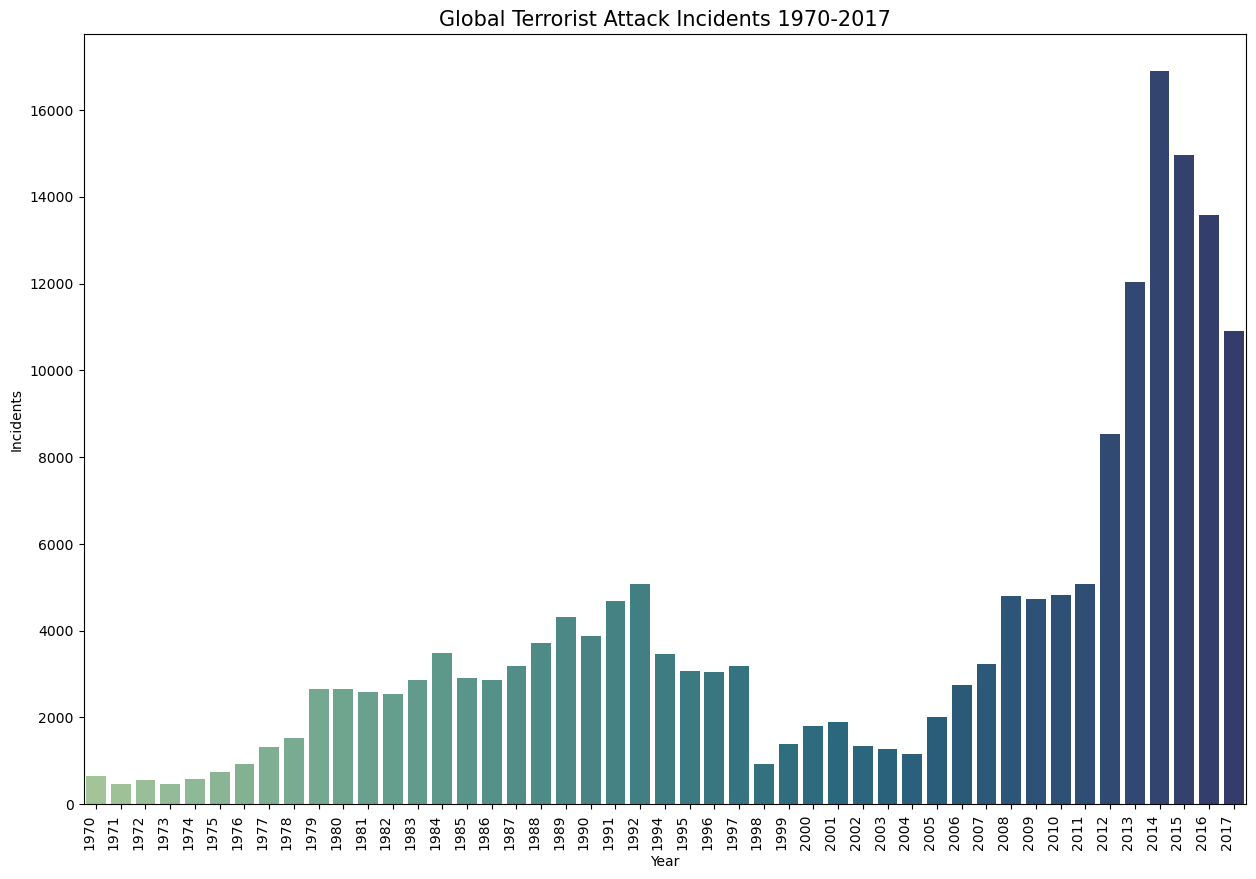

In [20]:
plt.figure(figsize = (15,10))
ax = sns.countplot(x='Year',data=df,palette='crest')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Global Terrorist Attack Incidents 1970-2017',size=15)
plt.ylabel('Incidents')

We can see here that attacks slowly start to increase from 1970 until about 1993 where until 2003 we see a downward global trend in Terrorist incidents.Then there is a sharp rise in the number of attacks/incidents.Since 2014 and 2015 has a large number of Terrorist activities.

### Type of Terror Attack

Text(0, 0.5, 'Count of Year')

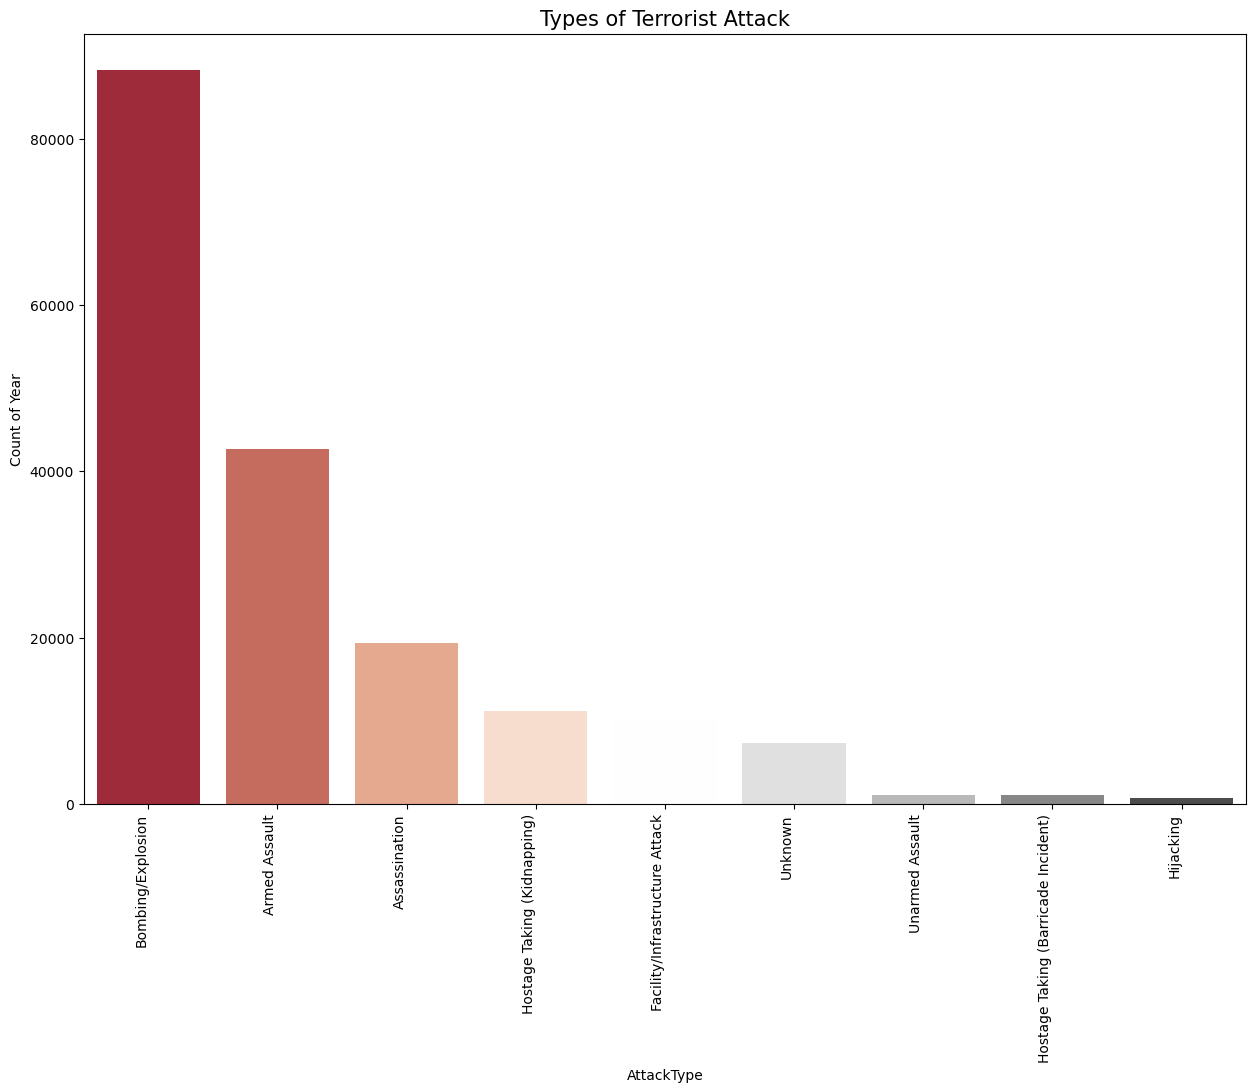

In [21]:
plt.figure(figsize= (15,10))
ax = sns.countplot(x = 'AttackType' ,data = df ,palette = 'RdGy', order = df['AttackType'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Types of Terrorist Attack',size=15)
plt.ylabel('Count of Year')

Here we can see that in the past years the overwhelming favored form of attack has been bombings with it being the choice of terrorists more than twice that of Armed Assaults.Interestingly, hijacking is in last despite its prevalence.

### Global bombings 

In [22]:
df_bombing = df[df['AttackType'] == 'Bombing/Explosion']

Text(-3.9305555555555483, 0.5, 'Incidents')

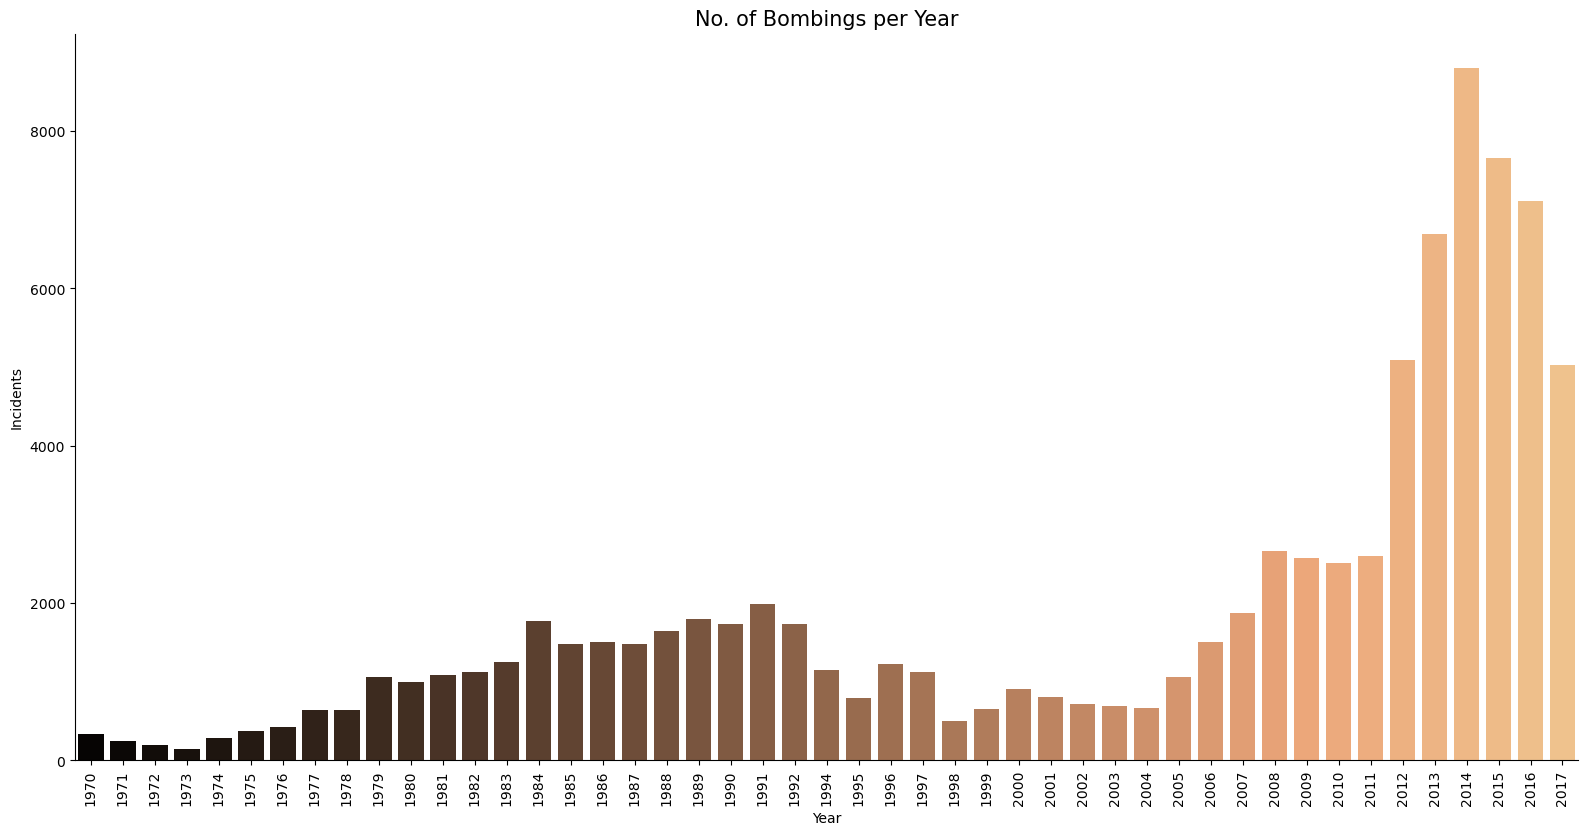

In [25]:
sns.catplot(x ='Year', data = df_bombing , kind = 'count', height = 8
           , aspect = 2, palette = 'copper')
plt.xticks(rotation= 90)
plt.title('No. of Bombings per Year', size = 15)
plt.ylabel('Incidents')

We can see that the number of bombings follows roughly the same trend as global attack, but that it has a sharper decline of occurrences in the early 90s.

### Terrorist Attack by Region

Text(0, 0.5, 'No. of Attacks')

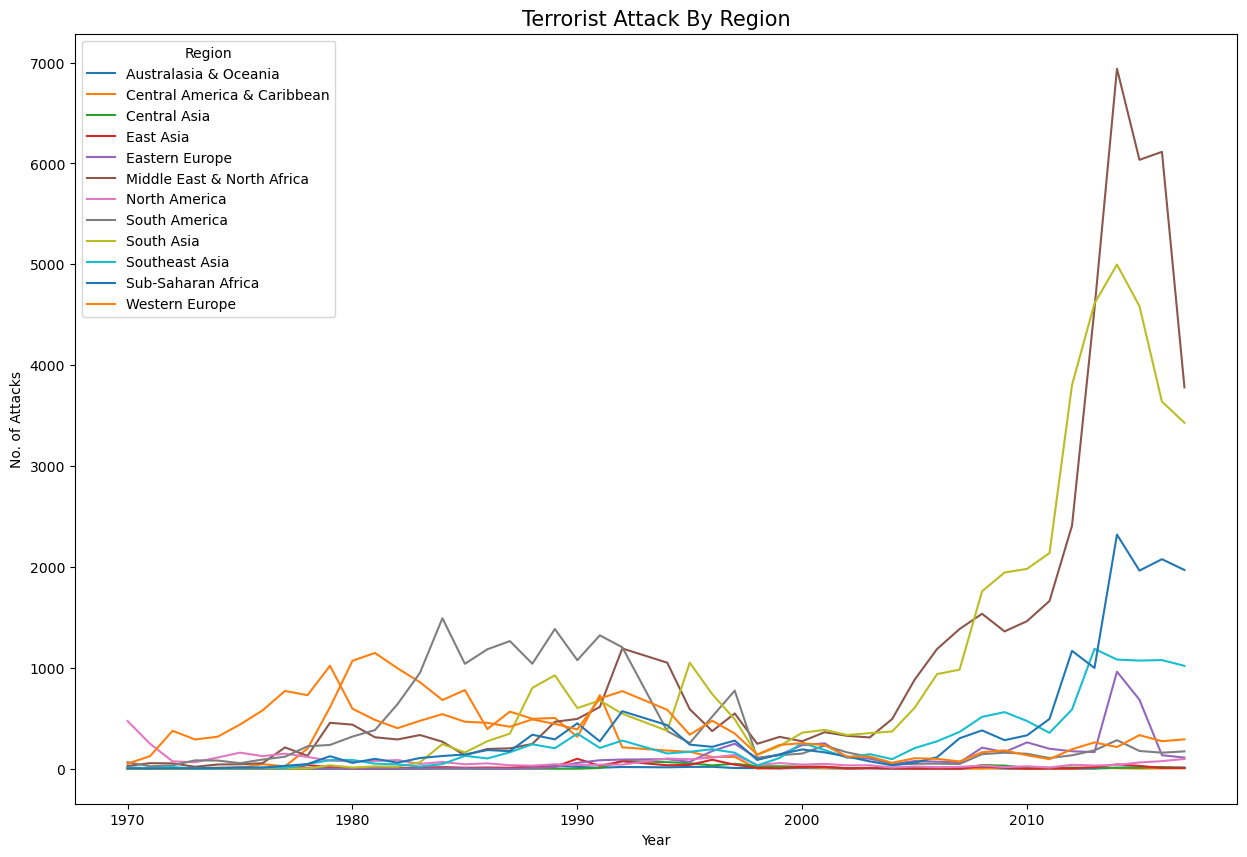

In [26]:
pd.crosstab(df.Year,df.Region).plot(figsize = (15,10))
plt.title('Terrorist Attack By Region', size =15)
plt.ylabel('No. of Attacks')

Here it becomes very clear how the overall trend over attacks has changed over the years in different regions across the globe. We can also see that come we experience the same jump in numbers and see that the Middle East and North Africa along with South Asia are the hardest hit by terrorist attacks.

### Target Type Plot 

Text(0.5, 1.0, 'Type of Target')

<Figure size 1800x1000 with 0 Axes>

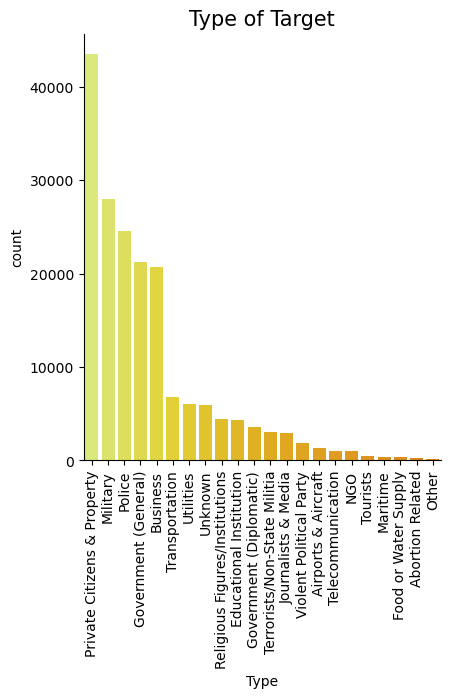

In [34]:
plt.figure(figsize = (18,10))
sns.catplot(x='TargetType', data=df, order=df['TargetType'].value_counts().index
            , palette='Wistia', kind='count')
plt.xticks(rotation = 90)
plt.xlabel('Type')
plt.title('Type of Target', size = 15)


We can see overwhelmingly that the most frequent target is civilians who as a result also suffer the most at the hands of terrorists.

### Total Number of Terrorist Attack in each country

Text(0.5, 1.0, 'Top-10: Total Attacks by Country')

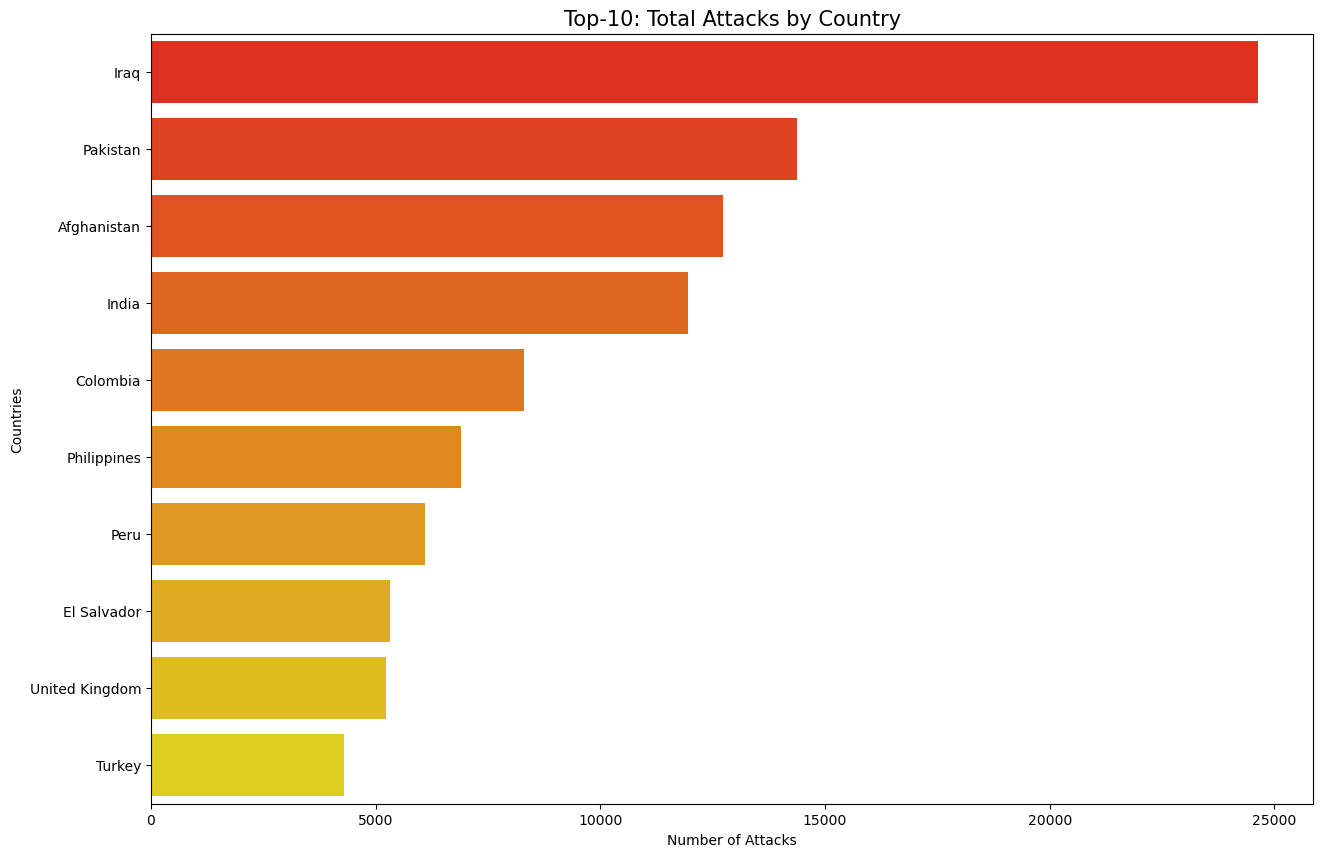

In [36]:
plt.figure(figsize = (15,10))
sns.barplot(x = df['Country'].value_counts().values[:10], 
            y = df['Country'].value_counts()[:10].index,palette = 'autumn')
plt.xlabel('Number of Attacks')
plt.ylabel('Countries')
plt.title('Top-10: Total Attacks by Country', size = 15)


With the plot above we can see that Iraq followed Pakistan are the countries with most terrorism occurences in 2017 (and also in all period).

### Terrorist Attack By Region

Text(0.5, 1.0, 'Distribution of Attacks per Region (1970-2017)')

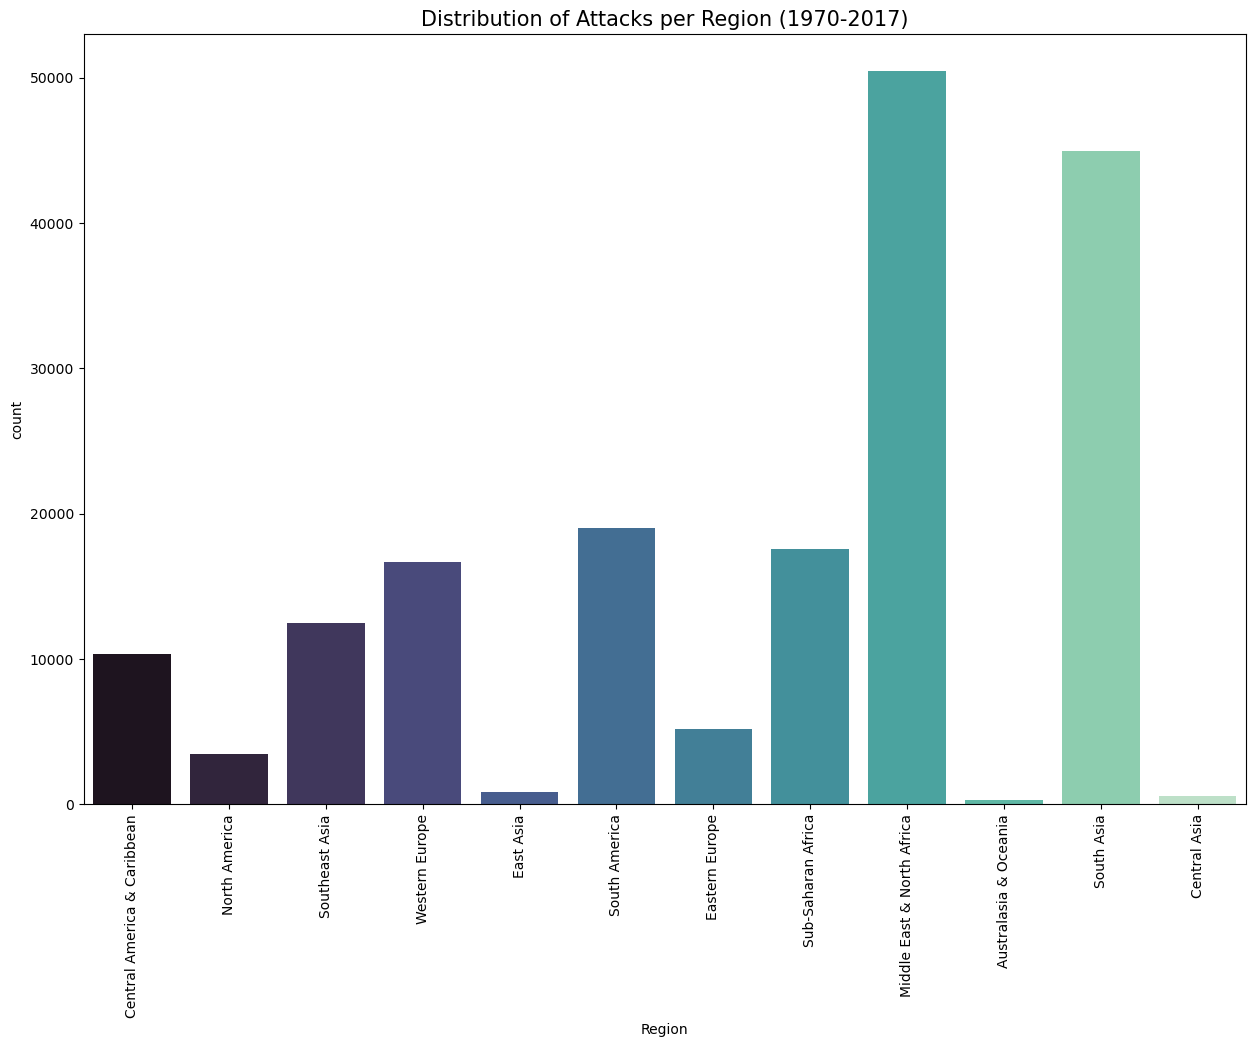

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot('Region', data=df, palette='mako')
plt.xticks(rotation=90)
plt.title('Distribution of Attacks per Region (1970-2017)', size=15)

 The highest concentration of incidentes recorded are from Middle East & South Asia. 

### Iraq Terrorism Analysis

In [38]:
#Preparing the data for analysis
Iraq = df[df.Country == 'Iraq']
Iraq_cities = Iraq.groupby(by='City',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:5,]

Iraq_suicide_size = Iraq['suicide'].sum() / len(Iraq)
labels = ['Suicide', 'Not Suicide']

Iraq_year = Iraq.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]

Iraq_weapon = Iraq.groupby(by='WeaponType',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:,:2]

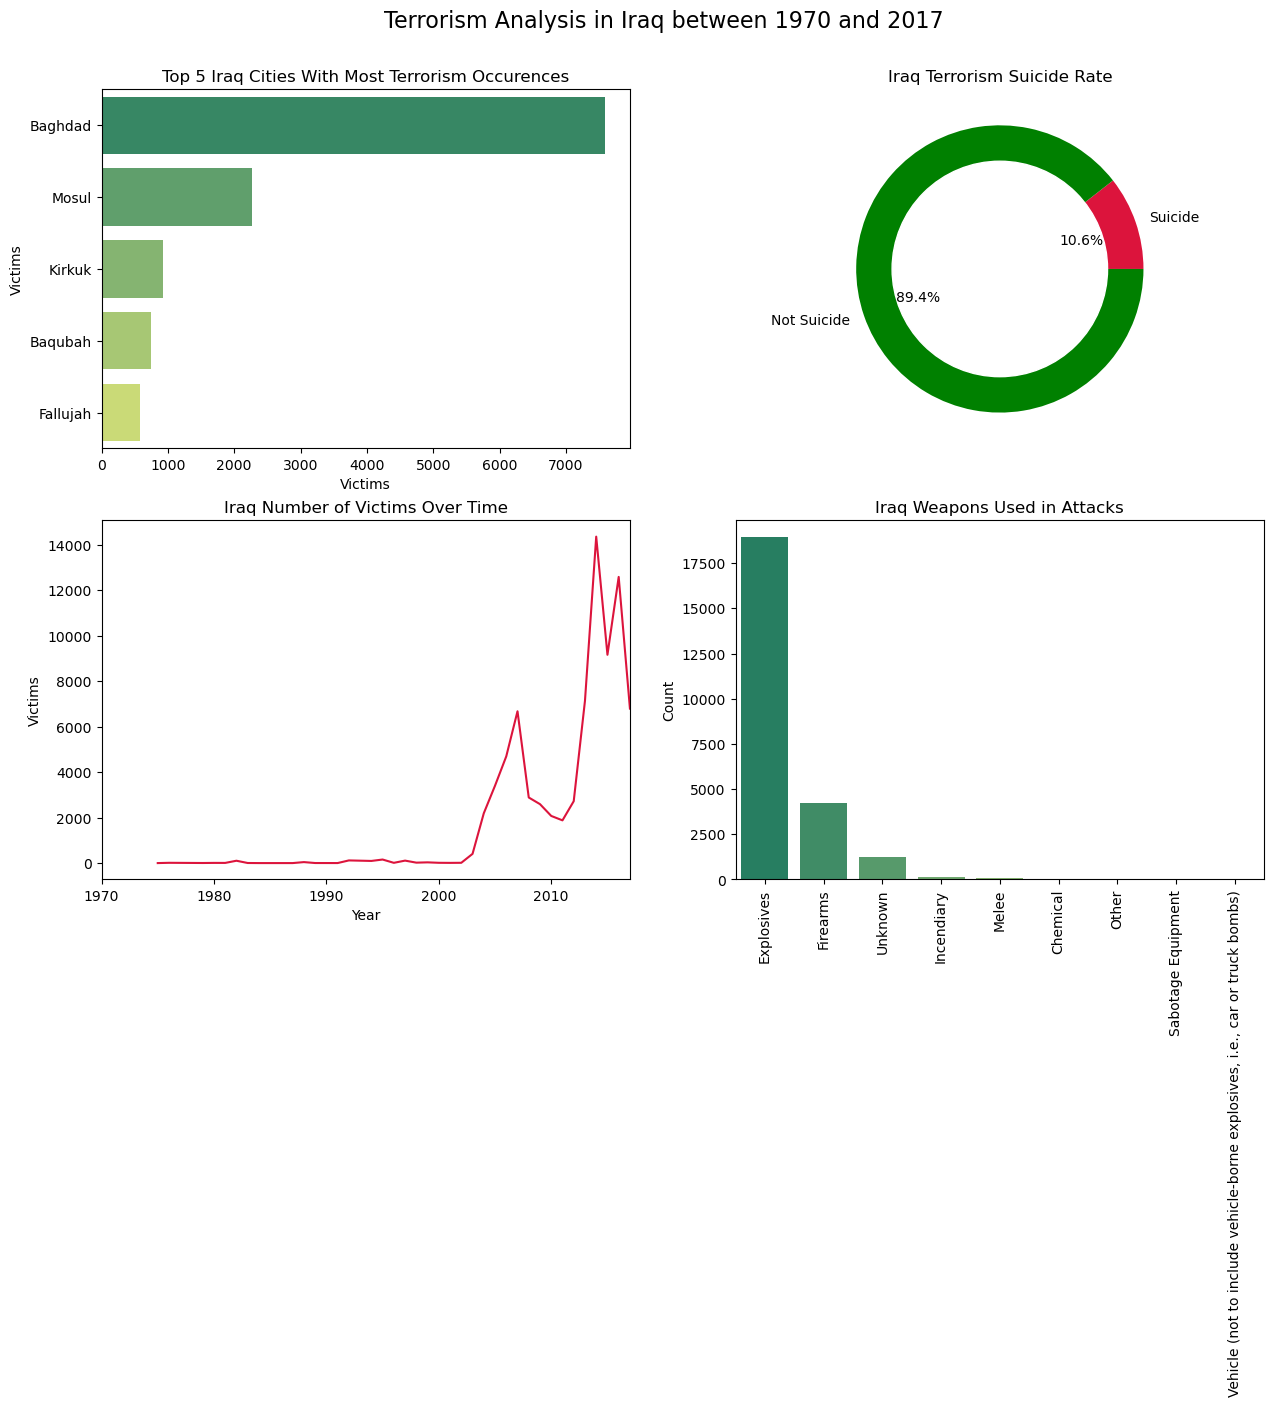

In [40]:
fig ,axs = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

# Plot 1 - Top 5 terrorism cities    
sns.barplot(x='eventid', y='City', data=Iraq_cities, ci=None, ax=axs[0, 0],palette='summer')
axs[0, 0].set_title(f'Top 5 Iraq Cities With Most Terrorism Occurences')
axs[0, 0].set_ylabel('City')
axs[0, 0].set_xlabel('Victims')

# Plot 2 - Suicide Rate
center_circle = plt.Circle((0,0), 0.75, color='white')
axs[0, 1].pie((Iraq_suicide_size, 1-Iraq_suicide_size), labels=labels,colors=['crimson','green'] , autopct='%1.1f%%')
axs[0, 1].add_artist(center_circle)
axs[0, 1].set_title('Iraq Terrorism Suicide Rate')
axs[0, 0].set_ylabel('Victims')

# Plot 3 - Victims through the years
sns.lineplot(x='Year', y='Killed', data=Iraq_year, ax=axs[1, 0],color='crimson')
axs[1, 0].set_xlim([1970, 2017])
axs[1, 0].set_title('Iraq Number of Victims Over Time')
axs[1, 0].set_ylabel('Victims')

# Plot 4 - Terrorism Weapons
sns.barplot(x='WeaponType', y='eventid', data=Iraq_weapon, ci=None, ax=axs[1, 1],palette='summer')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Iraq Weapons Used in Attacks')

plt.suptitle('Terrorism Analysis in Iraq between 1970 and 2017', size=16)    
plt.subplots_adjust(top=0.90)
plt.show()

## Terrorism Analysis for India

In [41]:
# Preparing the data for analysis in India
India = df[df.Country == 'India']
India_cities = India.groupby(by='City', as_index=False).count().sort_values(by='eventid', ascending=False).iloc[:5,]

India_suicide_size = India['suicide'].sum() / len(India)
labels = ['Suicide', 'Not Suicide']

India_year = India.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]

India_weapon = India.groupby(by='WeaponType', as_index=False).count().sort_values(by='eventid', ascending=False).iloc[:, :2]


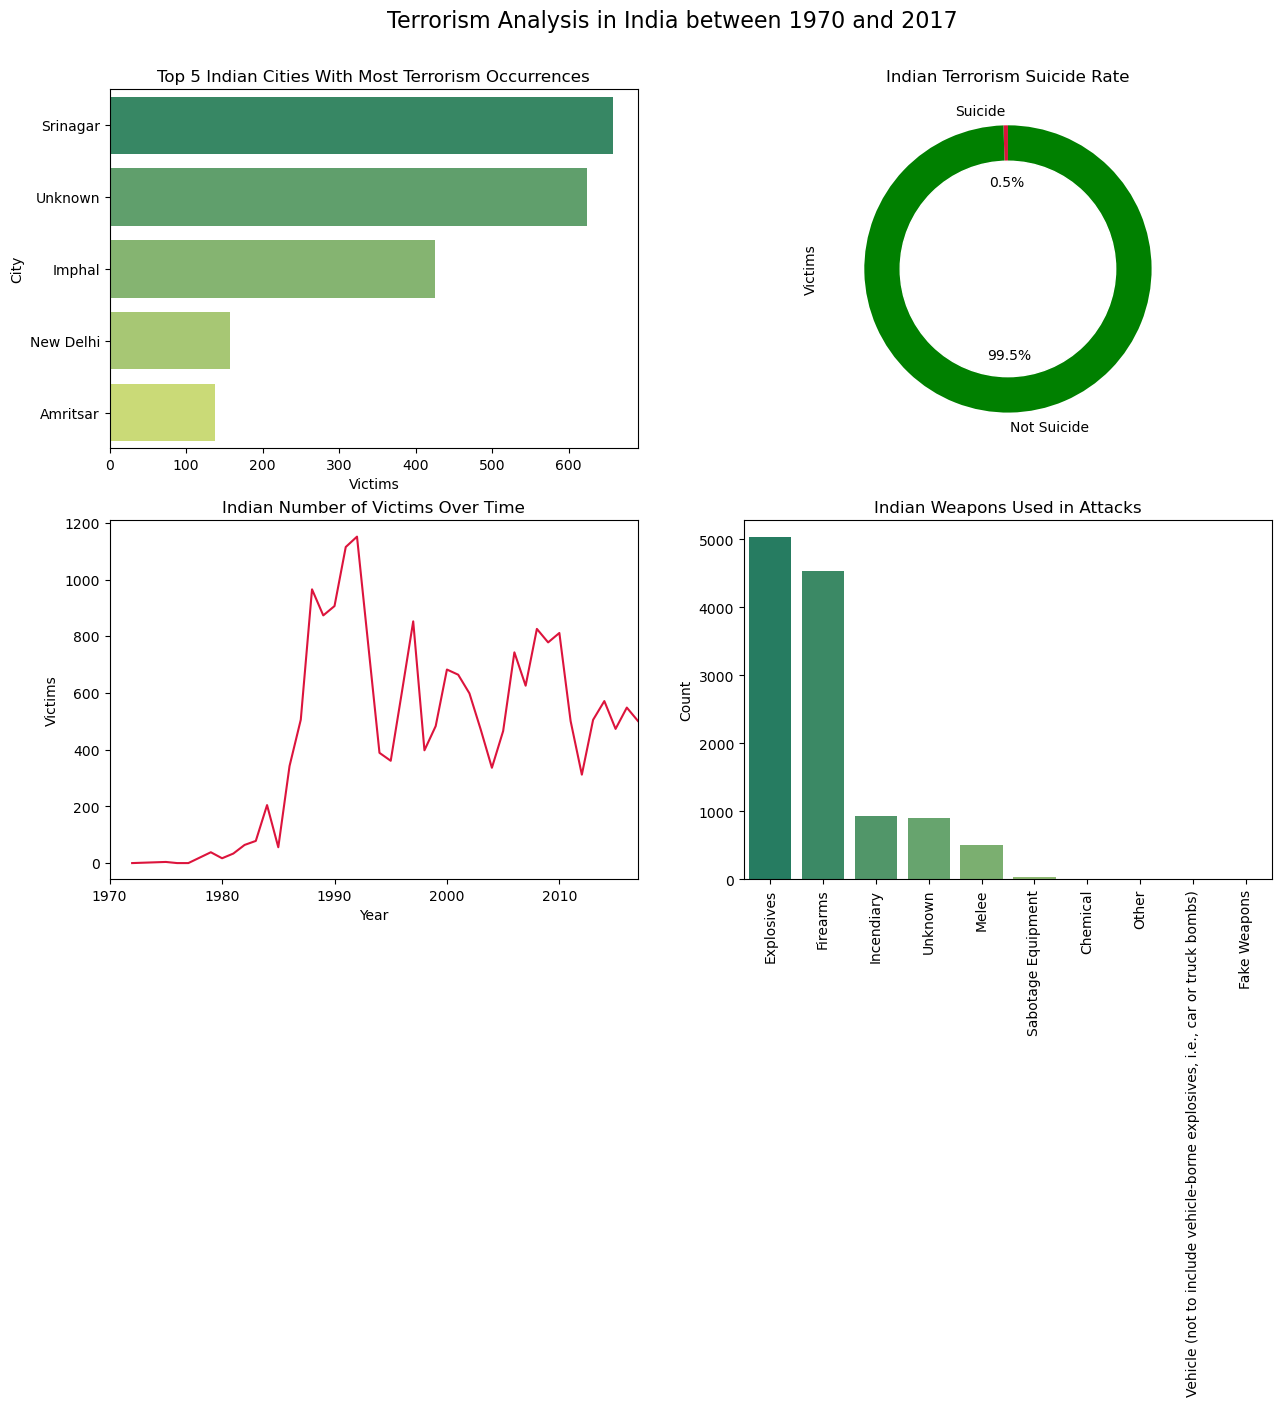

In [55]:
fig, axs = plt.subplots(nrows = 2,ncols = 2, figsize = (15,10))

#Plot-1 - Top 5 Terrorism cities in India
sns.barplot(x='eventid', y='City', data=India_cities, ci=None, ax=axs[0, 0], palette='summer')
axs[0, 0].set_title(f'Top 5 Indian Cities With Most Terrorism Occurrences')
axs[0, 0].set_ylabel('City')
axs[0, 0].set_xlabel('Victims')

# Plot 2 - Suicide Rate in India
center_circle = plt.Circle((0, 0), 0.75, color='white')
axs[0, 1].pie((India_suicide_size, 1 - India_suicide_size), labels=labels, colors=['crimson', 'green'], autopct='%1.1f%%', startangle = 90)
axs[0, 1].add_artist(center_circle)
axs[0, 1].set_title('Indian Terrorism Suicide Rate')
axs[0, 1].set_ylabel('Victims')

# Plot 3 - Victims through the years in India
sns.lineplot(x='Year', y='Killed', data=India_year, ax=axs[1, 0], color='crimson')
axs[1, 0].set_xlim([1970, 2017])
axs[1, 0].set_title('Indian Number of Victims Over Time')
axs[1, 0].set_ylabel('Victims')

# Plot 4 - Terrorism Weapons in India
sns.barplot(x='WeaponType', y='eventid', data=India_weapon, ci=None, ax=axs[1, 1], palette='summer')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Indian Weapons Used in Attacks')

plt.suptitle('Terrorism Analysis in India between 1970 and 2017', size=16)
plt.subplots_adjust(top=0.90)
plt.show()

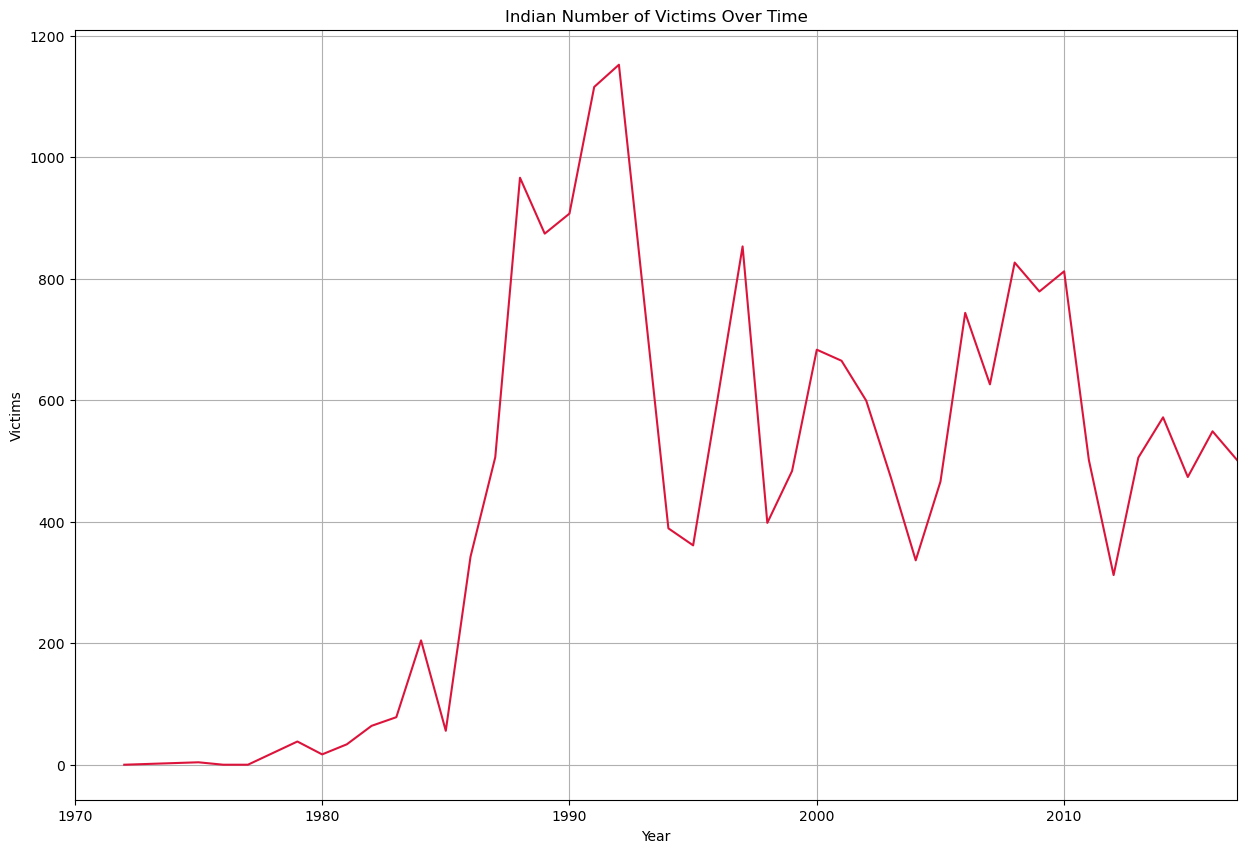

In [54]:
plt.figure(figsize = (15, 10))
# Plot 3 - Victims through the years in India
sns.lineplot(x='Year', y='Killed', data=India_year, color='crimson')
plt.xlim([1970, 2017])
plt.title('Indian Number of Victims Over Time')
plt.ylabel('Victims')
plt.grid(True)
plt.show()


**Insights Derived From EDA**

- Most attacks happened in 2014.
- Bombing was the most favoured form of attack used.
- The Middle East and South Asia Regions has most taregeted.
- There are maximum number of attacks in Private citizens and Property.
- Iraq is the country where maximum terrorist attaked happened.

# Thanks

# --------------------------------------------------*****-------------------------------------------------------